In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import glob





In [2]:
 #motion field ->optical flow
 #ground truth kell
path=glob.glob("Synthetic_MICCAI2020_dataset/Video_01/images/*.png")
ground_truth_path=("Synthetic_MICCAI2020_dataset/Video_01/ground_truth/*.png")
speed_values=[]
def get_images(path):
    imgs=[]
    i=0
    for img in path[:10]:
        img = cv2.imread('Synthetic_MICCAI2020_dataset/Video_01/images/'+ '00' + str(i)+ '.png')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        imgs.append(img)
        #plt.imshow(img)
        #plt.show()
        i = i + 1
    return imgs

def to_gray(imgs):
    grays=[]
    for img in imgs:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        grays.append(gray)
    return grays

def get_ground_truth(path):
    ground_truth=[]
    i=0
    for img in path[:10]:
        img = cv2.imread('Synthetic_MICCAI2020_dataset/Video_01/ground_truth/'+ '00' + str(i)+ '.png')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ground_truth.append(img)
        #plt.imshow(img)
        #plt.show()
        i = i + 1
    return ground_truth









In [3]:
def get_corners(prev,current):
 featrue_params=dict(maxCorners=6,
                      qualityLevel=0.3,
                      minDistance=3,
                      #blocksize=7
                      )
 k=0.004
 lk_params=dict(winSize=(15,15),
                 maxLevel=2,
                 criteria=(cv2.TermCriteria_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03)) 
 prev_img=prev 
 
 prev_pts=cv2.goodFeaturesToTrack(prev_img,**featrue_params)
 prev_corners=np.intp(prev_pts)
 current_img=current
 current_pts,status,err=cv2.calcOpticalFlowPyrLK(prev_img,current_img,prev_pts,None,**lk_params)
 current_corners=np.intp(current_pts)
 return prev_corners,current_corners

def calculate_speed(prev,current):
 prev_corners,current_corners=get_corners(prev,current)
 
 #euclidan distance
 #sqrt((x2-x1)^2 + (y2-y1)^2)
 #x distance
 distance=np.sqrt((current_corners[:,:,:1]-prev_corners[:,:,:1])**2
                  #y distance
                +(current_corners[:,:,1:]-prev_corners[:,:,1:])**2)
 speed=np.mean(distance)                                                                                
 
                                                                                          
 #print("prev corners:",(prev_corners))                                                          
 #print("current corners: ",current_corners)
 #print(prev_corners.shape)
 #print(prev_corners[:,:,:1])
 #print(prev_corners[:,:,1:])

 


 #print(current_corners.shape)

 #speed=
 speed_values.append(speed)
 return speed

           

 



In [4]:
def plot_corners(prev,current,prev_out,current_out):
    prev_corners,current_corners=get_corners(prev,current)
    speed=calculate_speed(prev,current)
    
    if(len(prev_corners)<=10): 
     for pts in prev_corners:
        x,y= pts.ravel()
        cv2.circle(prev_out,(x,y),5,255,3)
    for pts in current_corners:
        x,y= pts.ravel()
        cv2.circle(current_out,(x,y),5,255,3)
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1),plt.imshow(prev_out)
    plt.title('Previous'),plt.xticks([]),plt.yticks([])
    plt.subplot(1,2,2),plt.imshow(current_out)
    plt.title('Current'), plt.xticks([]), plt.yticks([])
    plt.suptitle("Speed is : %s"%str(speed))
    plt.draw(),plt.show()

def plot_speed(speed_values):
    plt.plot(speed_values)
    plt.xlabel('Frame number')
    plt.ylabel('Speed')
    plt.title('Speed values first 10 frames')
    plt.show()
               

     


    

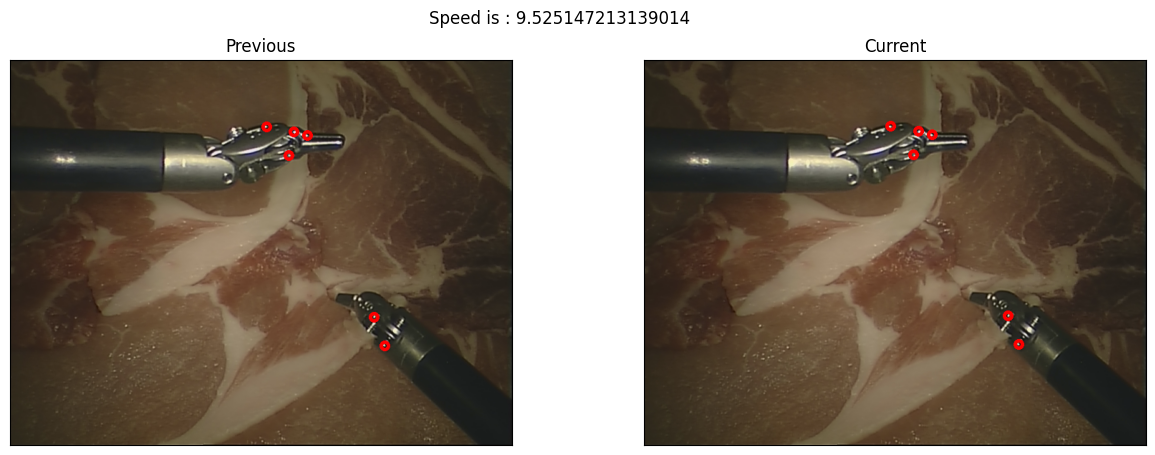

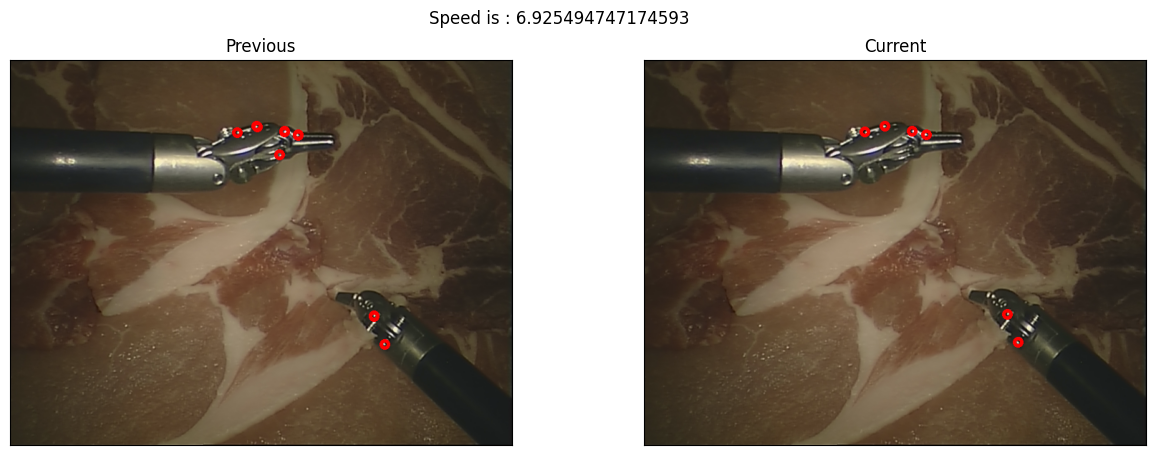

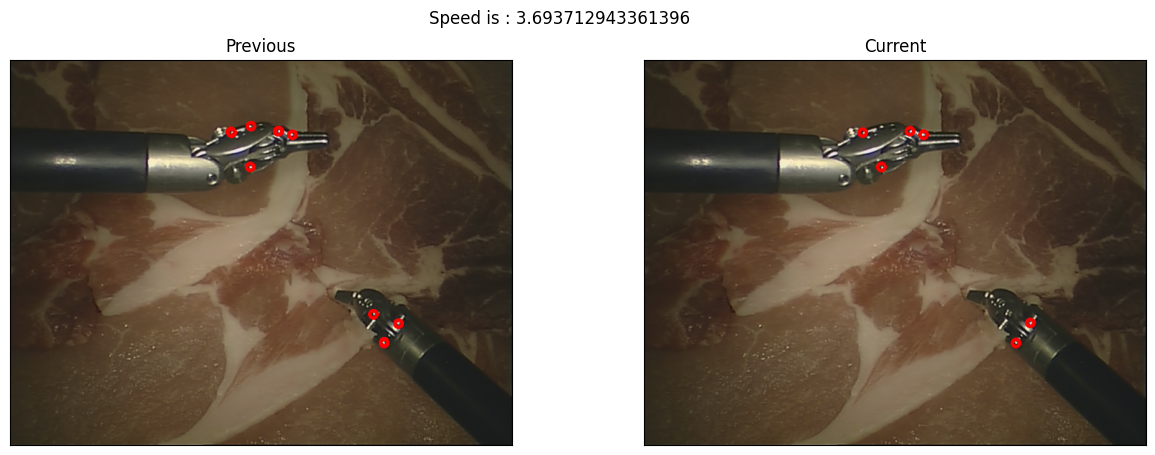

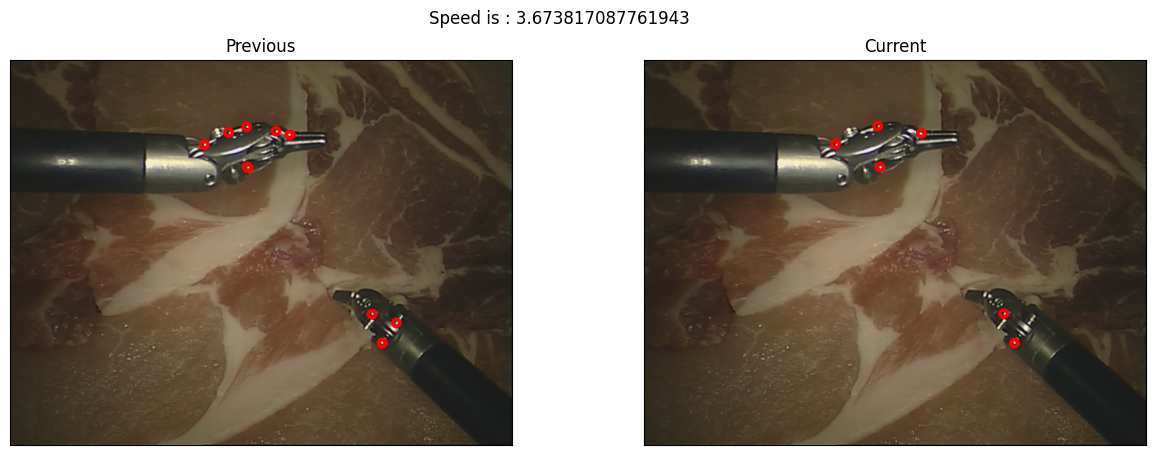

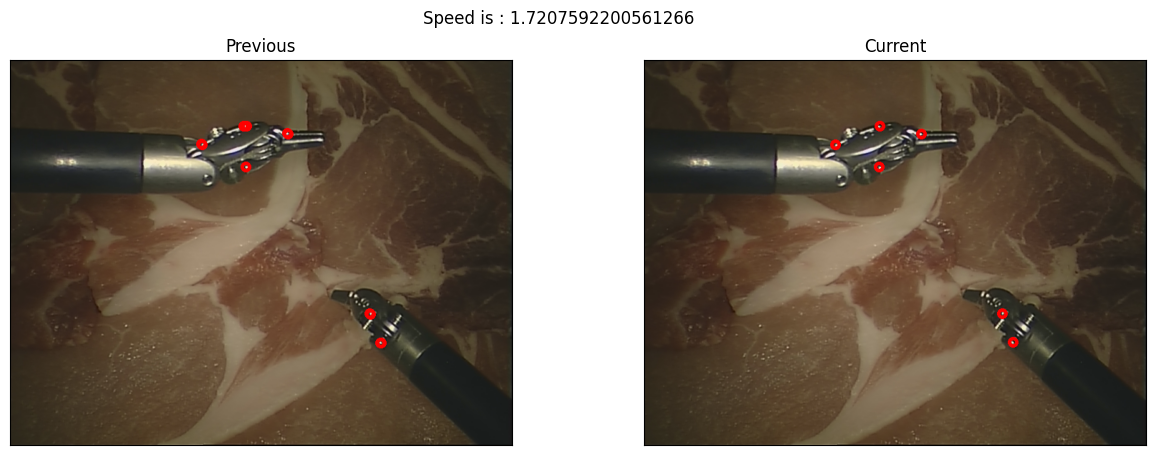

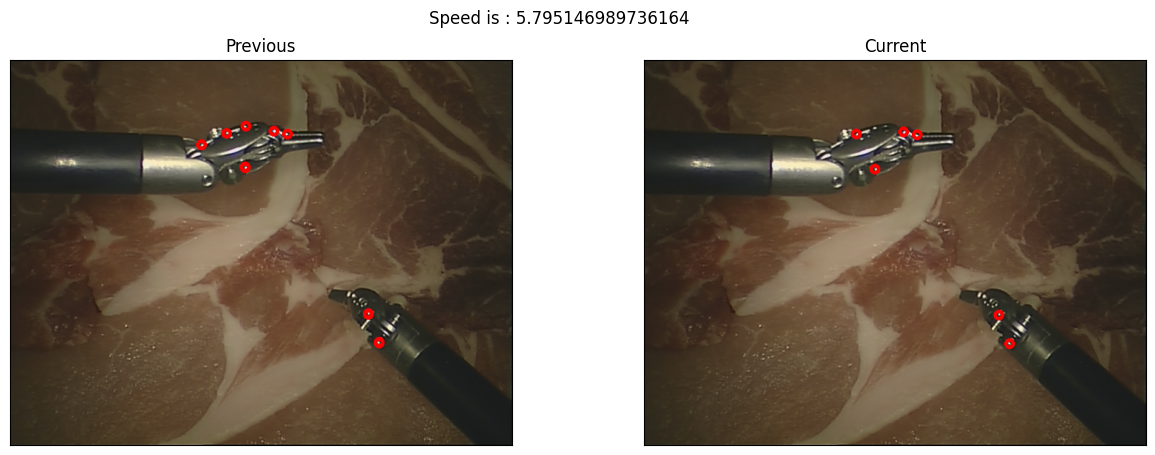

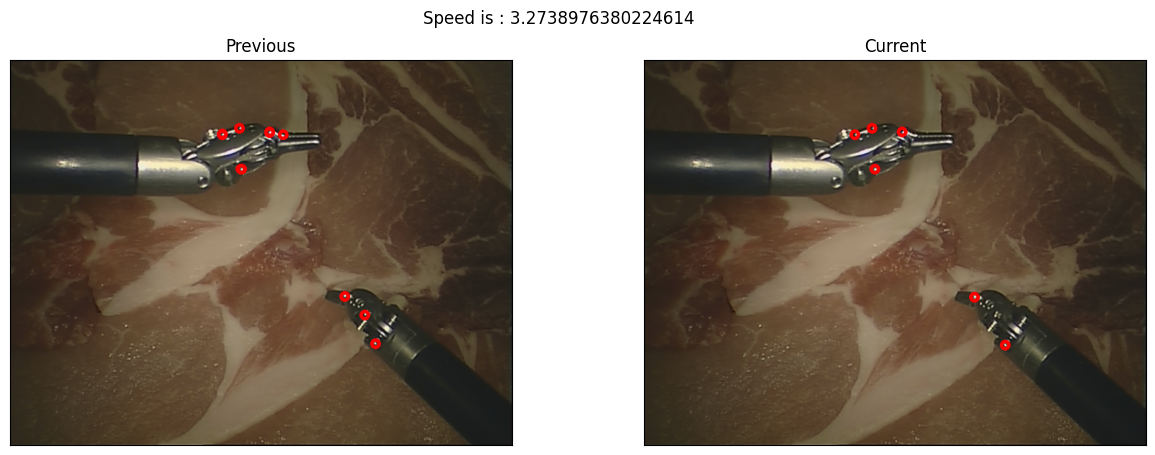

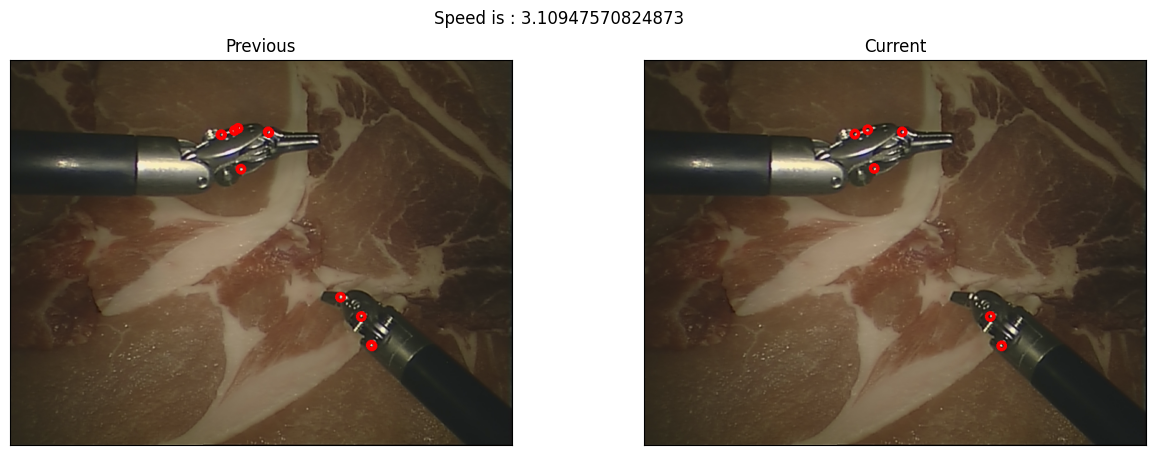

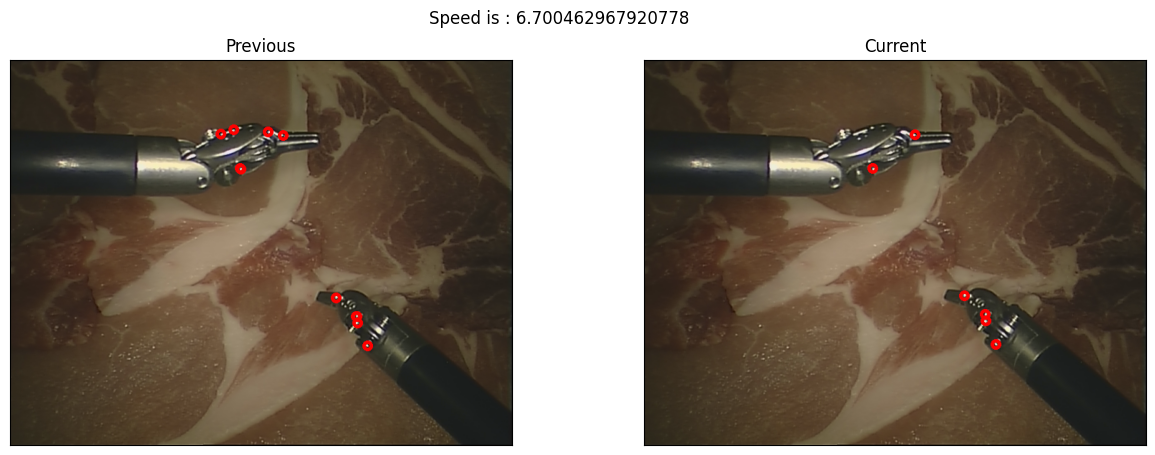

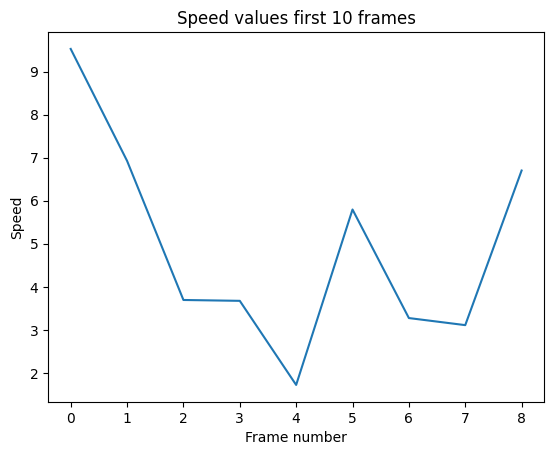

[9.525147213139014, 6.925494747174593, 3.693712943361396, 3.673817087761943, 1.7207592200561266, 5.795146989736164, 3.2738976380224614, 3.10947570824873, 6.700462967920778]


In [57]:
#Testing
imgs=get_images(path)
ground_truth=get_ground_truth(ground_truth_path)
#gray=to_gray(ground_truth)
gray=to_gray(imgs)
for i in range(len(imgs)-1):
 plot_corners(gray[i],gray[i+1],imgs[i],imgs[i+1]) 

plot_speed(speed_values)
print(speed_values)



6


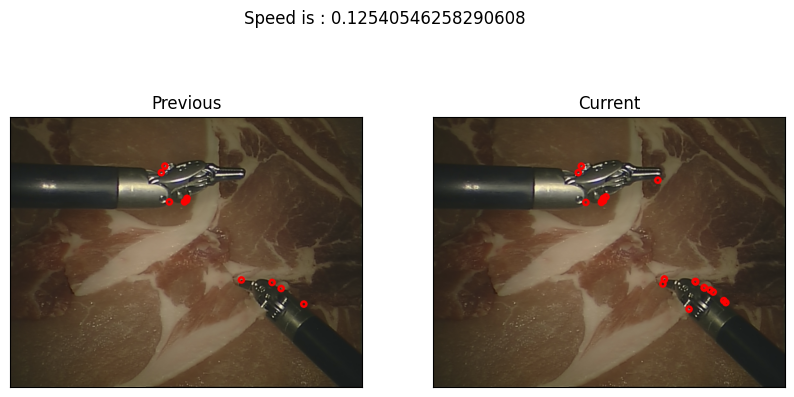

6


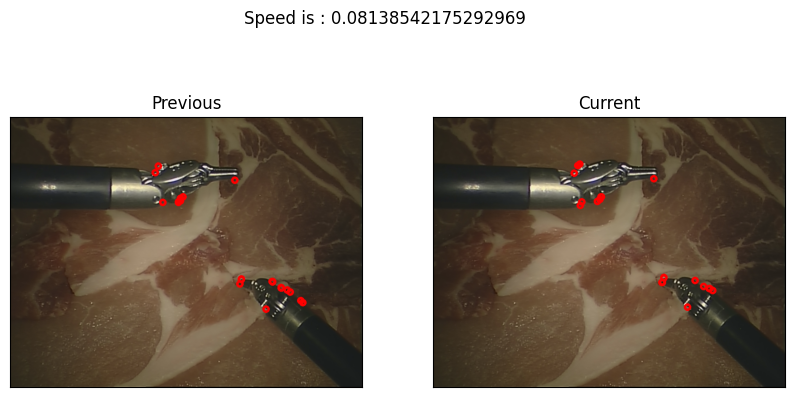

6


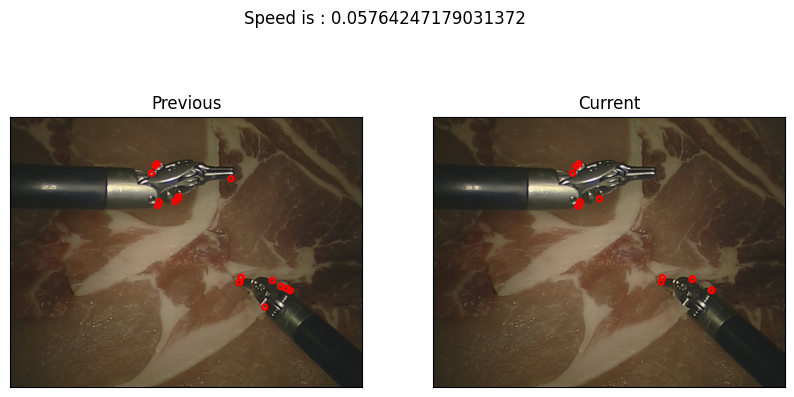

[0.12540546258290608, 0.08138542175292969, 0.05764247179031372]


In [22]:






#for i in range(len(to_gray)):
  #  corners=cv2.goodFeaturesToTrack(to_gray[i],maxCorners,qualityLevel,minDistance)
   # corners=np.int0(corners)
   # corners_array.append(corners)

#speed=np.mean(corners_array[1]-corners_array[0])

    

#out_img=[]
#for i in range(len(imgs)):
  #  out_img.append(imgs[i])
    
#for img in out_img:
 #   plt.imshow(img)
  #  plt.title('output image'+str(i))
   # plt.show()
   # i=i+1


#print(corners[0])
#j=0
#for corners in corners_array:
 #   for i in corners:
  #     x,y=i.ravel()
   # cv2.circle(out_img[j],(x,y),10,255,3)
    #plt.imshow(out_img[j])
    #plt.title('output image'+str(j+1))
    #plt.show()
    #j=j+1
    

        
        





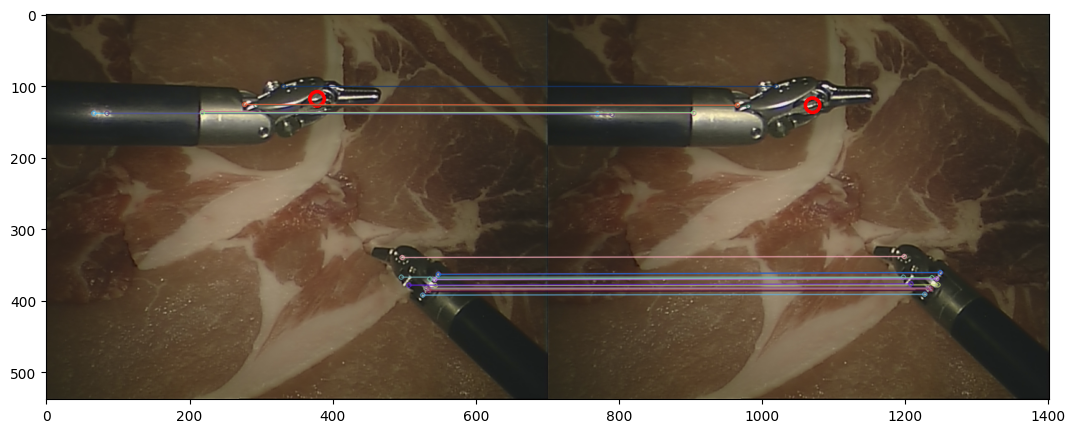

[< cv2.DMatch 000001A79E446D10>, < cv2.DMatch 000001A79E446150>, < cv2.DMatch 000001A79E447890>, < cv2.DMatch 000001A79E446610>, < cv2.DMatch 000001A79E447A50>, < cv2.DMatch 000001A79E445E50>, < cv2.DMatch 000001A79E4460D0>, < cv2.DMatch 000001A79E446230>, < cv2.DMatch 000001A79E446950>, < cv2.DMatch 000001A79E446B50>, < cv2.DMatch 000001A79E446D50>, < cv2.DMatch 000001A79E446E10>, < cv2.DMatch 000001A79E446E70>, < cv2.DMatch 000001A79E447390>, < cv2.DMatch 000001A79E4476D0>, < cv2.DMatch 000001A79E447770>, < cv2.DMatch 000001A79E445BF0>, < cv2.DMatch 000001A79E446370>, < cv2.DMatch 000001A79E446F10>, < cv2.DMatch 000001A79E446970>, < cv2.DMatch 000001A79E446FB0>, < cv2.DMatch 000001A79E447230>, < cv2.DMatch 000001A79E447AD0>, < cv2.DMatch 000001A79E445910>, < cv2.DMatch 000001A79E445B90>, < cv2.DMatch 000001A79E445D50>, < cv2.DMatch 000001A79E445F50>, < cv2.DMatch 000001A79E4460B0>, < cv2.DMatch 000001A79E4475F0>, < cv2.DMatch 000001A79E4477B0>, < cv2.DMatch 000001A79E445D10>, < cv2.D

In [10]:
orb=cv2.ORB_create()
kp1,des1=orb.detectAndCompute(imgs[0],None)
kp2,des2=orb.detectAndCompute(imgs[1],None)
plt.figure(figsize=(40,5))
bf=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
matches=bf.match(des1,des2)
matches=sorted(matches,key=lambda x:x.distance)
img3=cv2.drawMatches(imgs[0],kp1,imgs[1],kp2,matches[:20]
                     ,None,flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()
print(matches)


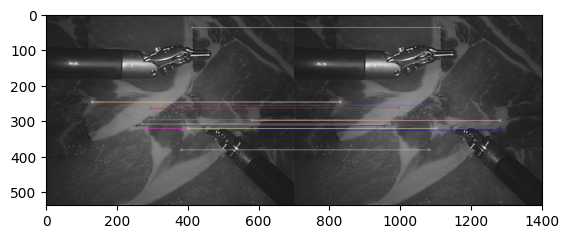

(<matplotlib.image.AxesImage at 0x1a79e48c210>, None)

In [8]:
sift=cv2.SIFT_create()
skp,sdes=sift.detectAndCompute(to_gray[0],None)
skp2,sdes2=sift.detectAndCompute(to_gray[1],None)
bf=cv2.BFMatcher()
matches=bf.knnMatch(sdes,sdes2,k=2)
good=[]
for m,n in matches:
    if m.distance< 0.1*n.distance:
        good.append([m])

img_s=cv2.drawMatchesKnn(to_gray[0],skp,to_gray[1],skp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img_s),plt.show()
        